# Data Summary and Businesss Problem

- Insert the data descriptions and the link etc.

# Model Prep

In [108]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from scipy import stats

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

pd.set_option("display.max_columns", None)

# set seed
import random
random.seed(5600)

In [109]:
#Load in the data and store it as ride

ride_full = pd.read_csv('../../02_project/data/rideshare_subset.csv')

ride_full = ride_full.dropna().reset_index(drop = True)
ride_full.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4577.000000,4.577000e+03,4.577000e+03,4577.000000,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03,4577.000000,4.577000e+03
mean,1.544055e+09,11.725803,17.716627,11.592528,16.577671,2.218396,1.014475,42.338177,-71.065831,39.674381,36.018999,0.008880,0.143094,0.739600,6.137035,8.420939,1.544058e+09,8.534505,45.110201,1.544058e+09,34.220793,1.544110e+09,41.714448,1.544058e+09,30.225598,1.544107e+09,31.694706,1010.335722,219.689753,0.680542,0.248634,8.534505,312.942277,1.544035e+09,1.544069e+09,0.574903,0.037227,1.544052e+09,33.445040,1.544050e+09,45.325078,1.544056e+09,29.743240,1.544056e+09,42.088986,1.544056e+09
std,6.892093e+05,6.960787,9.947628,0.491418,9.070030,1.132395,0.097195,0.048034,0.020318,6.851340,8.065333,0.027257,0.324053,0.137669,3.152868,5.310053,6.936693e+05,2.527096,6.036917,6.936789e+05,6.315467,6.920019e+05,7.700090,6.940228e+05,7.923045,6.925180e+05,9.205721,13.504567,97.808975,0.362728,0.476514,2.527096,27.673767,6.910567e+05,6.905803e+05,0.246494,0.055250,6.911293e+05,6.539092,6.902815e+05,5.691830,6.901182e+05,7.148098,6.875209e+05,6.982644,6.909731e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.030000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.860000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543445e+09,6.000000,13.000000,11.000000,9.500000,1.340000,1.000000,42.350300,-71.081000,36.270000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.540000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.430000,999.890000,129.000000,0.350000,0.000000,8.540000,290.600000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543746e+09,12.000000,17.000000,12.000000,14.000000,2.210000,1.000000,42.351900,-71.063100,40.680000,36.010000,0.000000,0.000000,0.710000,5.680000,7.330000,1.543756e+09,9.876000,44.680000,1.543788e+09,34.180000,1.543817e+09,41.380000,1.543788e+09,30.030000,1.543817e+09,30.890000,1009.850000,256.000000,0.820000,0.000000,9.876000,305.500000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543748e+09,41.380000,1.543788e+09
75%,1.544831e+09,18.000000,28.000000,12.000000,22.500000,2.960000,1.000000,42.364700,-71.054200,43.610000,40.720000,0.000000,0.000000,0.880000,8.390000,11.740000,1.544846e+09,9.996000,47.060000,1.544814e+09,38.880000,1.544836e+09,44.120000,1.544818e+09,35.320000,1.544836e+09,38.560000,1021.940000,303.000000,1.000000,

- One thing that stands out for me is that this data comes from two months that I can tell having the minimum month being 11 ( November) and the max is 12 (December). Going forward this may be good for us to determine holiday pricing for uber drivers rather than any time of the year.
- There is also a lot of columns that basically tell us the same thing about each type of weather (temp, precipitation, wind etc.) that could be condensed down.

In [110]:
#There is a lot of columns that we really do not need so we will trim downn the dataset 
columns_to_keep = ['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier', 'apparentTemperature','precipProbability', 'windSpeed', 'name']

ride = ride_full[columns_to_keep]
ride.head()

,price,hour,day,month,distance,surge_multiplier,apparentTemperature,precipProbability,windSpeed,name
0,11.0,14,14,12,3.07,1.00,33.90,0.00,3.02,Lyft
1,8.0,13,27,11,1.89,1.00,42.13,0.61,5.23,UberPool
2,11.0,0,27,11,1.74,1.25,39.94,1.00,8.33,Lyft
3,14.0,21,1,12,1.50,1.00,38.55,0.00,3.03,UberXL
4,22.5,21,26,11,3.21,1.00,41.62,0.00,6.88,Lux


- These columns filter down the original columns and condenses them to the overall group (wind, precipitation, temp etc.)

In [111]:
#get the dummies for categorical data

ride_dummies = pd.get_dummies(data = ride, drop_first= True, dtype= int)
ride_dummies.columns

Index(['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier',
       'apparentTemperature', 'precipProbability', 'windSpeed',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

### Refference Columns
- name_black

# EDA

In [112]:
#verify the distribution of the name column across all kinds of ride share types
ride['name'].value_counts()

name
Black           408
UberX           408
WAV             401
Lux Black       394
UberXL          393
UberPool        386
Lyft XL         381
Black SUV       374
Lux             367
Lux Black XL    359
Shared          354
Lyft            352
Name: count, dtype: int64

- This is good to see that we have a fairly uniform distribution across the board for the different kinds of ubers and lyfts

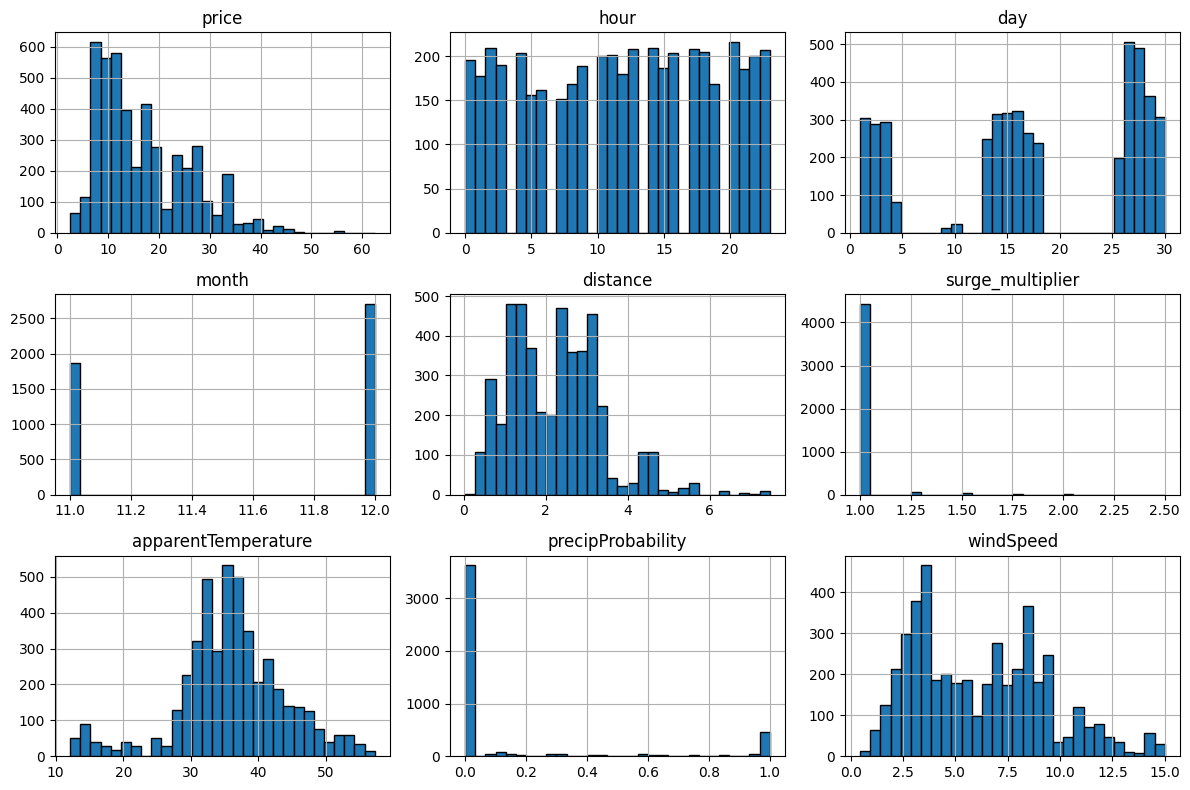

In [113]:
# Create histograms for each numerical column
ride.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout() 
plt.show()

- Again here this confirms what we were seeing before about month, being only november and december. We will have to be cautious when predicting and interpreting prices outside this range.
- It is good to see that temperature, windspeed, and price are roughly normal. It is also good to see that hour is roughly uniform telling us we will have price data for all hours of the day for the most part.

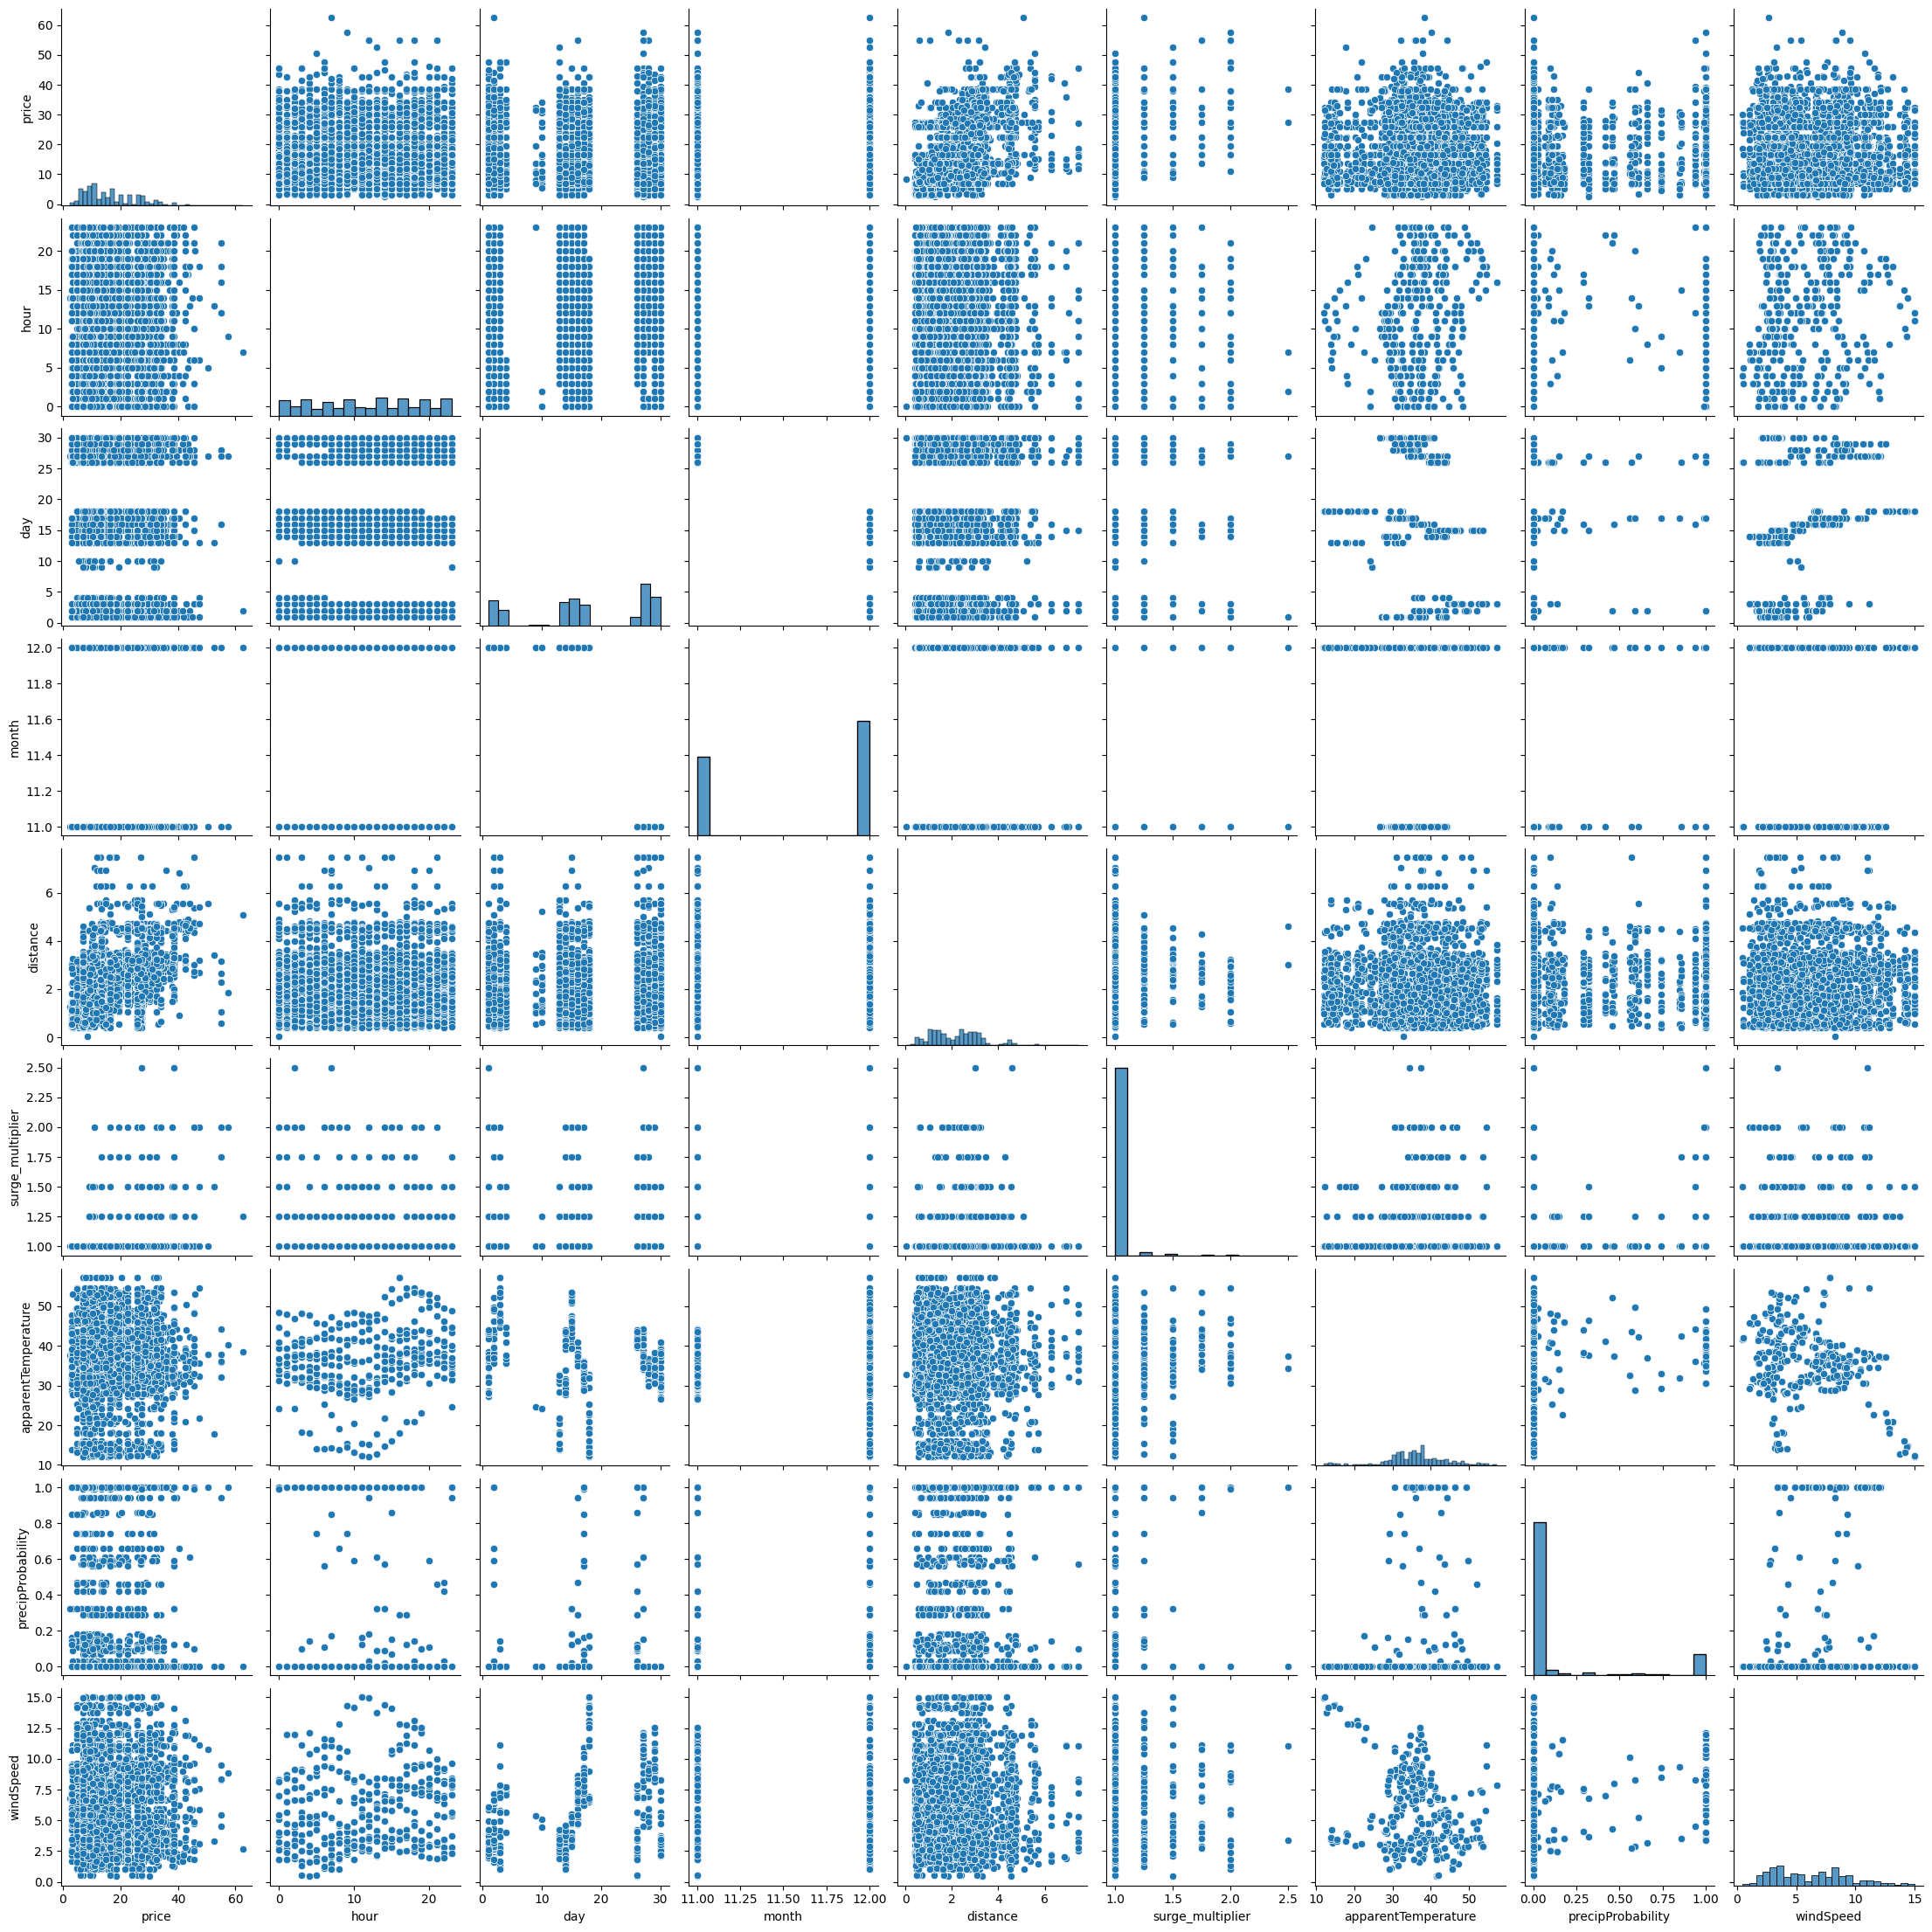

In [114]:
sns.pairplot(ride)

- Overall looking all vars compared with price it is slightly concening to see that most of our predictors do not have a linear realtionship with price. The only column that appears to have this somewhat linear relationship at the moment is distance with price, however it seems to be a weak positive relationship. There does not appear to be any variables that are colinear

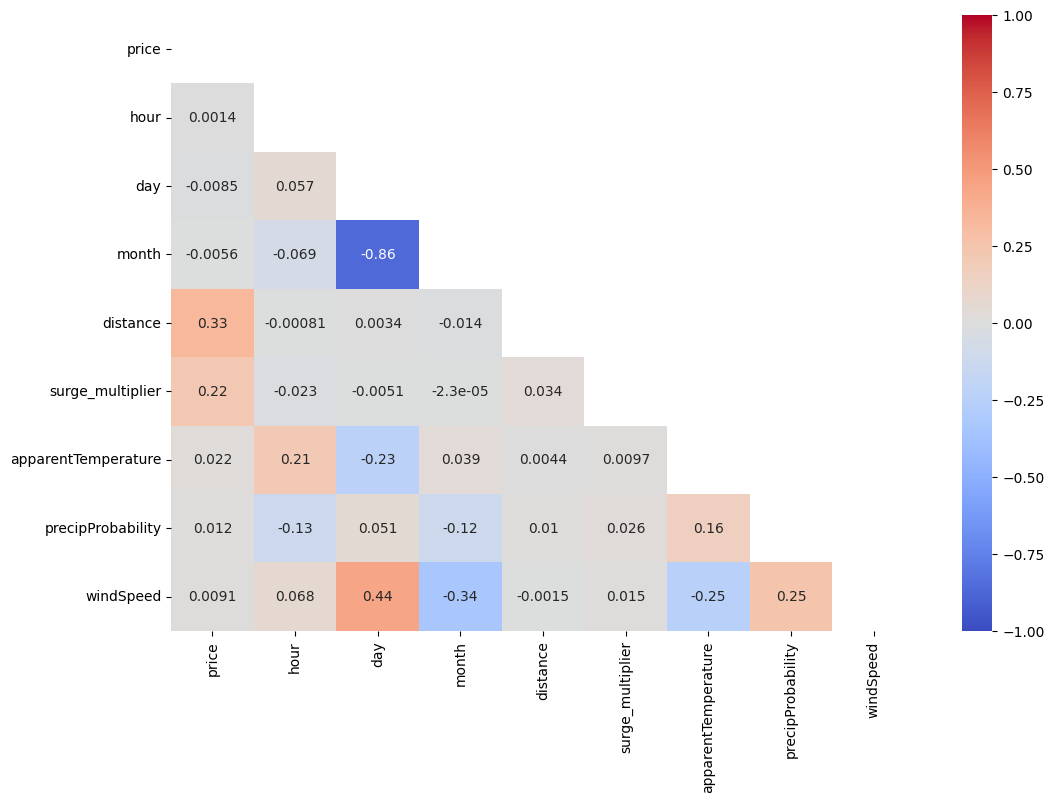

In [115]:
# Compute correlation matrix once
corr_matrix = ride.select_dtypes(include=['number']).corr()

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm',  # Color palette
            annot=True,  # Show correlation values
            vmin=-1, vmax=1,  # Normalize color scale
            mask=np.triu(corr_matrix))  # Hide upper triangle

plt.show()

- Some items that we are starting to notice may be causing possible issues of multicolinearity is day and hour. As far as varaibles that may be a good predictor of price based soley off this heat map is distance and surge_multiplier, as they have the highest positive relationship with price.

# Baseline Model

In [116]:
y = ride_dummies['price']
X = sm.add_constant(ride_dummies.iloc[:, 1:20]) 
mod = sm.OLS(y, X)
res = mod.fit()

ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3229.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:48:30   Log-Likelihood:                -10472.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4557   BIC:                         2.111e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.9504      1.962     -2.523      0.012      -8.798      -1.103
hour                    0.0033      0.005      0.619      0.536      -0.007       0.014
day                     0.0062      0.008      0.791      0.429      -0.009       0.022
month                   0.1753      0.151      1.164      0.245      -0.120       0.471
distance                2.7200      0.031     87.021      0.000       2.659       2.781
surge_multiplier       16.7726      0.370     45.281      0.000      16.046      17.499
apparentTemperature     0.0063      0.005      1.245      0.213      -0.004       0.016
precipProbability      -0.0190      0.120     -0.158      0.874      -0.254       0.216
windSpeed               0.0085      0.013      0.631      0.528      -0.018       0.035
name_Black SUV         10.1780      0.171     59.477      0.000       9.843      10.514
name_Lux               -3.0410      0.173    -17.628      0.000      -3.379      -2.703
name_Lux Black          2.2936      0.169     13.549      0.000       1.962       2.625
name_Lux Black XL      11.2029      0.174     64.560      0.000      10.863      11.543
name_Lyft             -11.1636      0.175    -63.942      0.000     -11.506     -10.821
name_Lyft XL           -5.5172      0.171    -32.205      0.000      -5.853      -5.181
name_Shared           -13.9711      0.174    -80.405      0.000     -14.312     -13.630
name_UberPool         -11.4938      0.170    -67.624      0.000     -11.827     -11.161
name_UberX            -10.7168      0.167    -64.016      0.000     -11.045     -10.389
name_UberXL            -4.6733      0.169    -27.652      0.000      -5.005      -4.342
name_WAV              -10.5054      0.168    -62.479      0.000     -10.835     -10.176
==============================================================================
Omnibus:                     1414.883   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13616.547
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                      11.106   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Though the initial model seems to be having a high $ R^2 $ value and has a significant f-statistic, when we start looking at significance at the predictor level the varaibales that are actually significant at this point are distance, surge_multiplier, and the name of the cab type. This is more than likely a theme we will start to see throughout the regualization steps

# Regularization and Variable Selection

### Sequential Replacement

In [117]:
seqrep_selection = SFS(LinearRegression(fit_intercept = True), 
                                        k_features = (1, len(X.columns)), 
                                        forward = True, 
                                        floating = True,
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)

seqrep = seqrep_selection.fit(X, y)

print('Sequential Replacement Stepwise Selection:', seqrep.k_feature_names_)

Sequential Replacement Stepwise Selection: ('const', 'distance', 'surge_multiplier', 'windSpeed', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV')


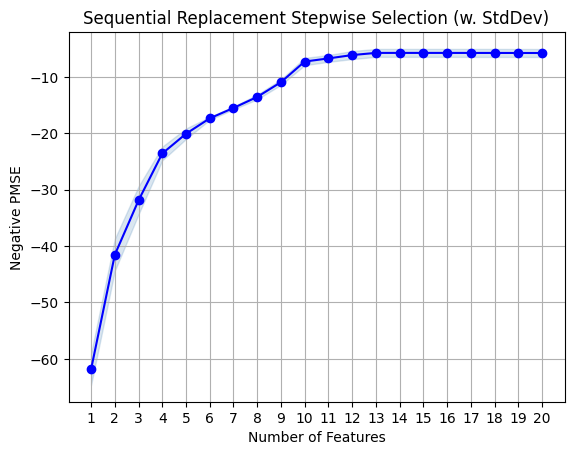

In [118]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(seqrep.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Replacement Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [119]:
# Code to see the next best models
seqrep_results = pd.DataFrame.from_dict(seqrep.get_metric_dict()).T
seqrep_results_sorted = seqrep_results.sort_values(by = 'avg_score', ascending = False)
seqrep_results_sorted.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...","[-5.895408861709316, -5.129896248390241, -6.84...",-5.74839,"(const, distance, surge_multiplier, windSpeed,...",0.905046,0.704157,0.352078
14,"(4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...","[-5.8954088617093126, -5.129896248390246, -6.8...",-5.74839,"(distance, surge_multiplier, windSpeed, name_B...",0.905046,0.704157,0.352078
13,"(4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)","[-5.895364274318589, -5.130346417705384, -6.84...",-5.748426,"(distance, surge_multiplier, name_Black SUV, n...",0.905344,0.704389,0.352194
16,"(0, 1, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[-5.899435200065594, -5.128695640232621, -6.84...",-5.750614,"(const, hour, distance, surge_multiplier, wind...",0.907447,0.706025,0.353012
17,"(0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...","[-5.893747425547131, -5.135949261473027, -6.86...",-5.754043,"(const, day, month, distance, surge_multiplier...",0.914174,0.711258,0.355629
18,"(0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...","[-5.897123964420268, -5.134828267911524, -6.86...",-5.755836,"(const, hour, day, month, distance, surge_mult...",0.916133,0.712782,0.356391
19,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[-5.897452130573123, -5.136204533498748, -6.86...",-5.760118,"(const, hour, day, month, distance, surge_mult...",0.912094,0.70964,0.35482
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-5.9013317307697655, -5.157250198854057, -6.8...",-5.766526,"(const, hour, day, month, distance, surge_mult...",0.909667,0.707752,0.353876
12,"(4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19)","[-6.344060386936098, -5.468742699669373, -7.24...",-6.132847,"(distance, surge_multiplier, name_Black SUV, n...",0.917728,0.714023,0.357012
11,"(4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 19)","[-7.121242516892548, -6.173287500514865, -7.61...",-6.726705,"(distance, surge_multiplier, name_Black SUV, n...",0.779283,0.606309,0.303154


- As we were seeing above the main vars that are showing up as relavent are distance, surge_multiplier and the names of the cab types. Wind speed is showing up in this type of selection however the difference in avg_score by not inlcuding it is only 0.000036 of a difference which is virtually nothing. It makes more sense to leave it out since we will not include any other weather information

### Elastic Net

In [120]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)

# run cross-validation to find the best alpha and l1_ratio
ElasticNetCV_model = ElasticNetCV(alphas = potential_alphas, 
                                  cv = 5, 
                                  random_state = 12345, 
                                  max_iter = 10000, 
                                  fit_intercept = True)
ElasticNetCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = ElasticNetCV_model.alphas_
pmse_means = np.mean(ElasticNetCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(ElasticNetCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.00014734543096198358
One SE alpha: 0.005388438442608223


In [121]:
# Elastic Net results with lambda within one SE of the mean
en_1se = ElasticNet(alpha = alpha_1se,
                     fit_intercept = True)
en_1se.fit(X, y)

# Get coefficients
print(list(zip(en_1se.coef_, X)))

[(0.0, 'const'), (0.002740833991519517, 'hour'), (0.0010926996802982257, 'day'), (0.05294091698711146, 'month'), (2.719397101221421, 'distance'), (12.665467547988541, 'surge_multiplier'), (0.0063102968284347956, 'apparentTemperature'), (-0.0, 'precipProbability'), (0.009981433802641262, 'windSpeed'), (10.929768628854752, 'name_Black SUV'), (-1.670099853742771, 'name_Lux'), (3.419190433072189, 'name_Lux Black'), (12.029024925668743, 'name_Lux Black XL'), (-9.47817538113323, 'name_Lyft'), (-4.023347567031195, 'name_Lyft XL'), (-12.357549197798122, 'name_Shared'), (-9.994133645519245, 'name_UberPool'), (-9.261425313147022, 'name_UberX'), (-3.389174733771568, 'name_UberXL'), (-9.050479306764101, 'name_WAV')]


- Similar results to the sequential replacements method, we will move forward with the distance, surge_multiplier, and cab name.

### Variable Selection Summary

- Variables chosen:
    - Distance, Surge_Multiplier, name (with name_Black as a refference varaible for all other cab names.) 
    - Originally we wanted to see if different times of the day or other predictors such as the weather had a significant effect on the price of the ride share, but we can see that it really had no effect. This overall is better for our business problem as it really does simplyfy the amount of data needed to predict the price, and if it is fair or not.

# Rerun the Model With Best Variables Selected

In [122]:
#Create a new subset dataframe with the best vars chosen

ride_trim = ride[['price', 'distance', 'surge_multiplier', 'name']].dropna()
ride_trim = pd.get_dummies(ride_trim, drop_first= True, dtype= int)
ride_trim.head()

,price,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,11.0,3.07,1.00,0,0,0,0,1,0,0,0,0,0,0
1,8.0,1.89,1.00,0,0,0,0,0,0,0,1,0,0,0
2,11.0,1.74,1.25,0,0,0,0,1,0,0,0,0,0,0
3,14.0,1.50,1.00,0,0,0,0,0,0,0,0,0,1,0
4,22.5,3.21,1.00,0,1,0,0,0,0,0,0,0,0,0


In [123]:
#re-fit the model with the selected vars
y = ride_trim['price']
X = sm.add_constant(ride_trim.iloc[:, 1:14]) 

mod = sm.OLS(y, X)
res = mod.fit()

ride_trim['residuals'] = res.resid
ride_trim['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4721.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:48:37   Log-Likelihood:                -10474.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4563   BIC:                         2.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4924      0.392     -6.355      0.000      -3.261      -1.723
distance              2.7191      0.031     87.040      0.000       2.658       2.780
surge_multiplier     16.7712      0.370     45.321      0.000      16.046      17.497
name_Black SUV       10.1802      0.171     59.513      0.000       9.845      10.516
name_Lux             -3.0344      0.172    -17.608      0.000      -3.372      -2.697
name_Lux Black        2.2961      0.169     13.578      0.000       1.965       2.628
name_Lux Black XL    11.2134      0.173     64.707      0.000      10.874      11.553
name_Lyft           -11.1630      0.175    -63.968      0.000     -11.505     -10.821
name_Lyft XL         -5.5108      0.171    -32.221      0.000      -5.846      -5.175
name_Shared         -13.9702      0.174    -80.491      0.000     -14.310     -13.630
name_UberPool       -11.4799      0.170    -67.658      0.000     -11.812     -11.147
name_UberX          -10.7150      0.167    -64.036      0.000     -11.043     -10.387
name_UberXL          -4.6685      0.169    -27.644      0.000      -5.000      -4.337
name_WAV            -10.4996      0.168    -62.482      0.000     -10.829     -10.170
==============================================================================
Omnibus:                     1403.965   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13366.827
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                      11.030   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Right away we are starting to see that our predictor signifance has improved tremendously across all variables, suggesting that our varaible selection has improved the models predictive significance overall. We will still need to check assumptions and see the overall effectivness.

# Assumptions

## The X's vs Y are linear 

c:\Users\ksbuf\.pyenv\pyenv-win\versions\3.12.8\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


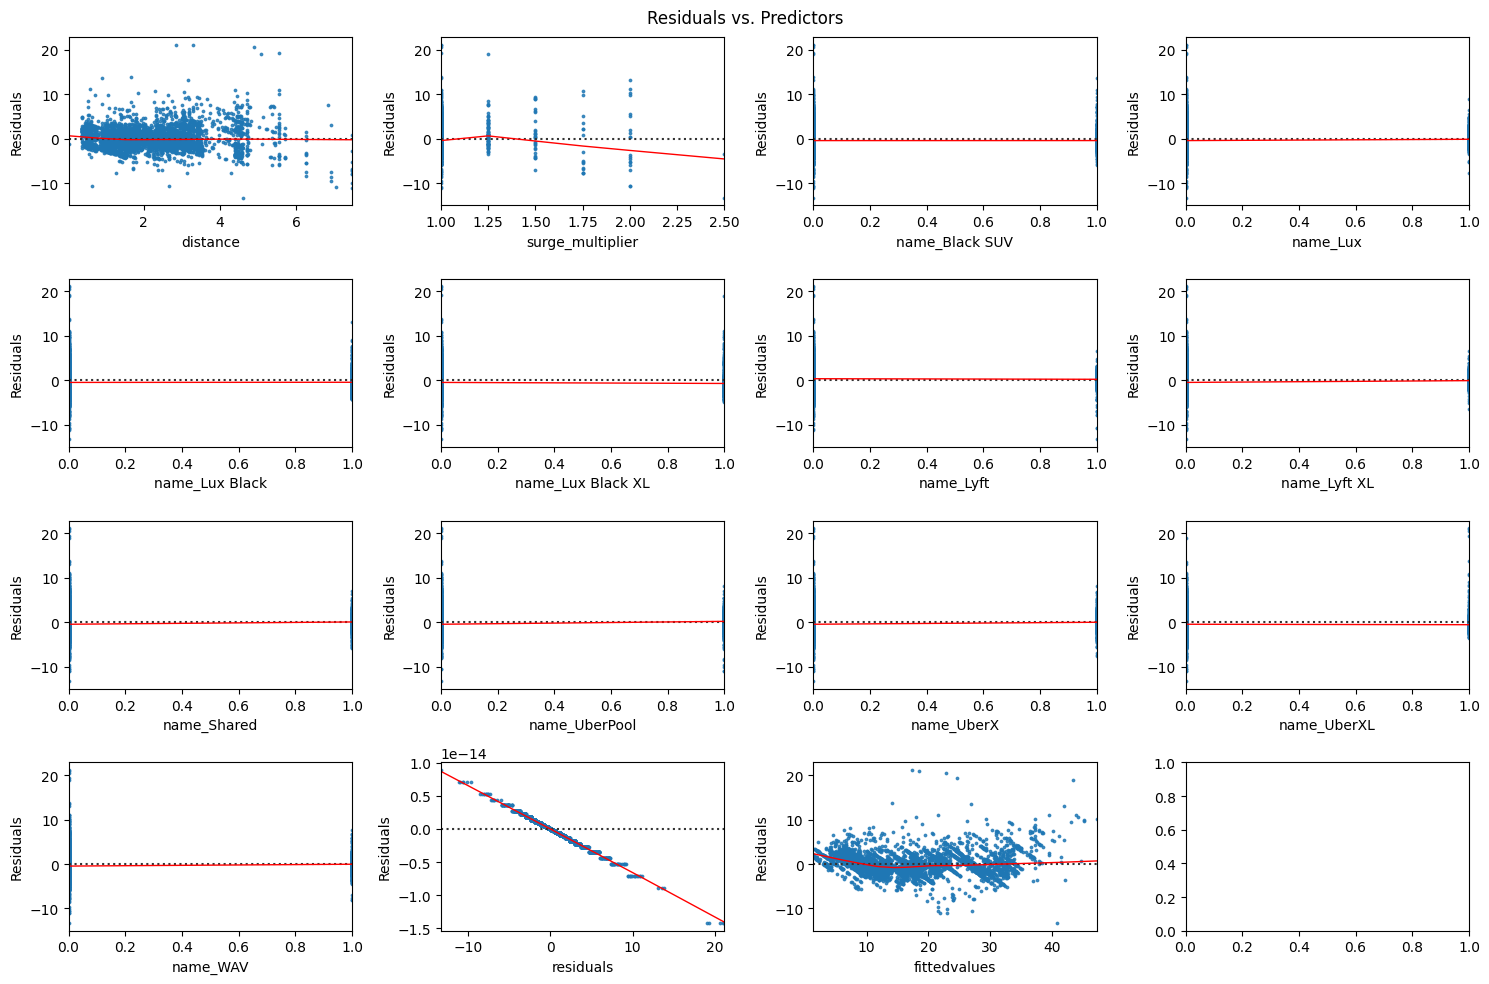

In [124]:
# Function to plot residuals vs. predictors
def res_vs_pred(variable, ax):
    sns.residplot(x=ride_trim[variable], 
                  y=ride_trim['residuals'],
                  lowess=True,
                  scatter_kws={'s': 3},
                  line_kws={'color': 'red', 'lw': 1},
                  ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# Define full list of predictors to plot
predictors = ride_trim.drop(columns = 'price', axis =1)

# Set up subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
plt.suptitle("Residuals vs. Predictors")

# Loop through predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), predictors):
    if predictor in ride_trim.columns:  # Ensure the variable exists before plotting
        res_vs_pred(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


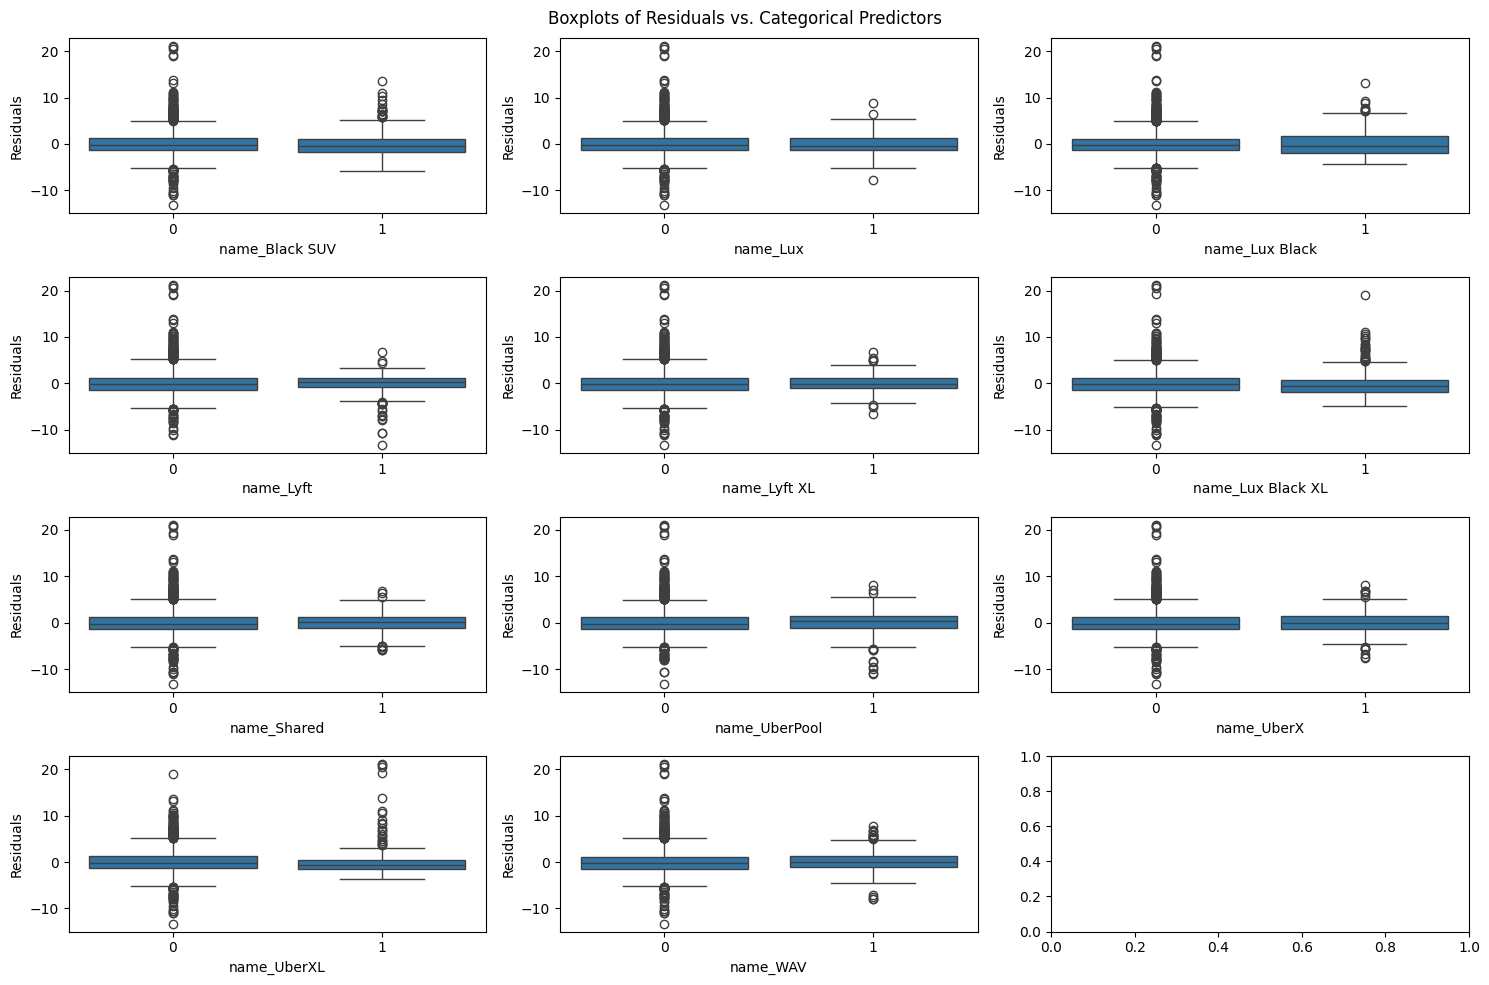

In [125]:

# Function to create box plot for categorical variables
def boxplot_residuals(variable, ax):
    sns.boxplot(x=ride_trim[variable], 
                y=ride_trim['residuals'], 
                ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# List of categorical predictors
categorical_predictors = [
    'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lyft', 'name_Lyft XL',
    'name_Lux Black XL', 'name_Shared', 
    'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'
]

# Set up subplots for categorical predictors
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
plt.suptitle("Boxplots of Residuals vs. Categorical Predictors")

# Loop through categorical predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), categorical_predictors):
    if predictor in ride_trim.columns:  # Ensure the variable exists before plotting
        boxplot_residuals(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


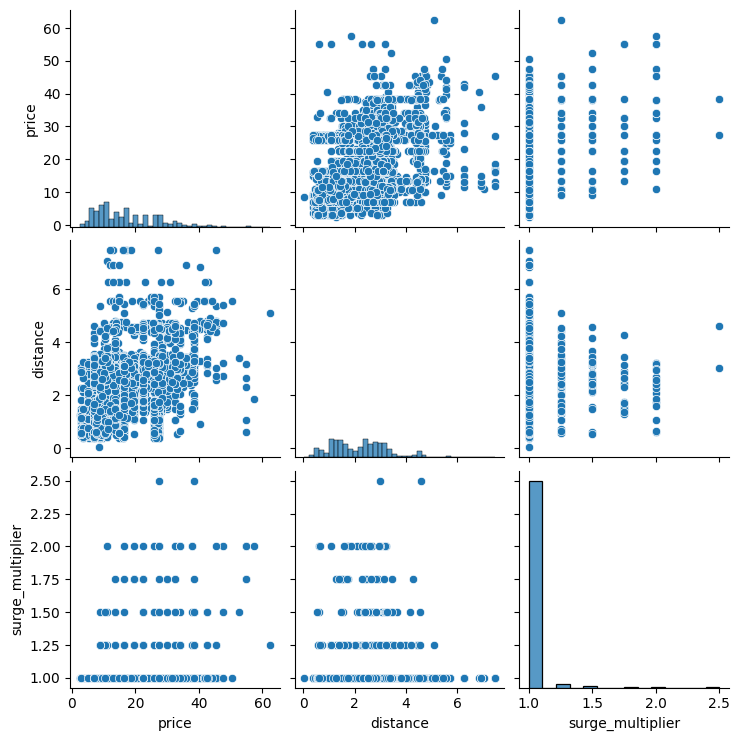

In [126]:

# Generate a scatterplot matrix of our numerical continuous data
sns.pairplot(ride_trim[['price','distance', 'surge_multiplier']])
plt.show()


### Section Summary

- ADD COMMENTS

## The residuals are independent 

The residuals are independent. The data was collected randomly and then a subset was chosen from that data that records driving information for random Taxi service trips.

## The residuals are normally distributed and centered at zero 

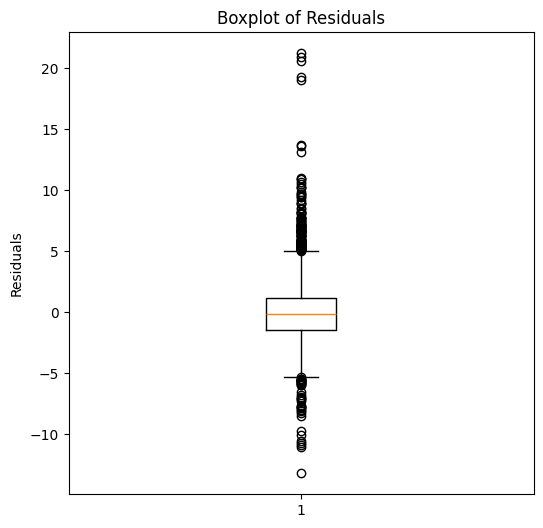

In [127]:
# Boxplot of residuals
fig = plt.figure(figsize=(6, 6))
plt.boxplot(ride_dummies['residuals'])  # Use the residuals from your model
plt.ylabel("Residuals")
plt.title("Boxplot of Residuals")
plt.show()


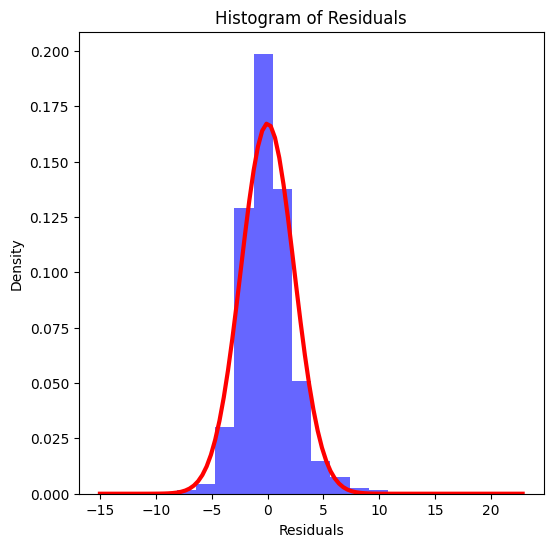

In [128]:


# Histogram of residuals from your model
fig = plt.figure(figsize=(6, 6))

# Plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(ride_trim['residuals'],  # Use residuals from the model
         density=True, 
         bins=20,  # Adjust the number of bins if necessary
         alpha=0.6, color='blue')

# Labeling the axes
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")

# Calculate mean and standard deviation
mean = np.mean(ride_trim['residuals'])  # Mean of residuals
sd = np.std(ride_trim['residuals'])  # Standard deviation of residuals

# Generate x values to plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot normal distribution curve
plt.plot(x, 
         stats.norm.pdf(x, mean, sd), 
         color='red', lw=3)  # Red line for normal distribution

# Show 
plt.show()

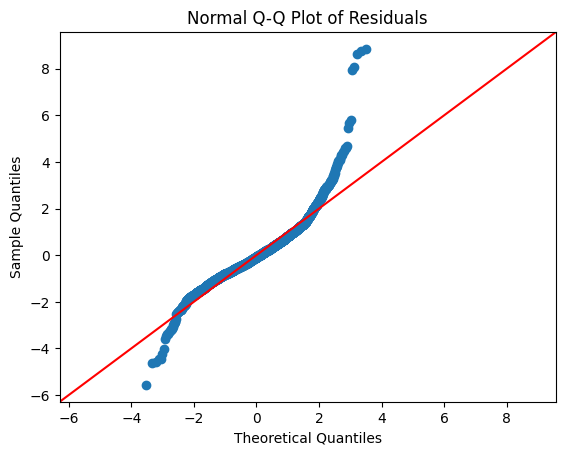

In [129]:
# Q-Q Plot (Normal Probability Plot) for residuals from your model
sm.qqplot(ride_trim['residuals'],  # Use residuals from the model
          line='45', 
          fit=True)

plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [130]:
#ADD THE WILKS SHAPIRO TEST? IDK IF WE NEED TO OR NOT

### Section Summary

- ADD COMMENTS HERE

##  The residuals have equal/constant variance across all values of X 

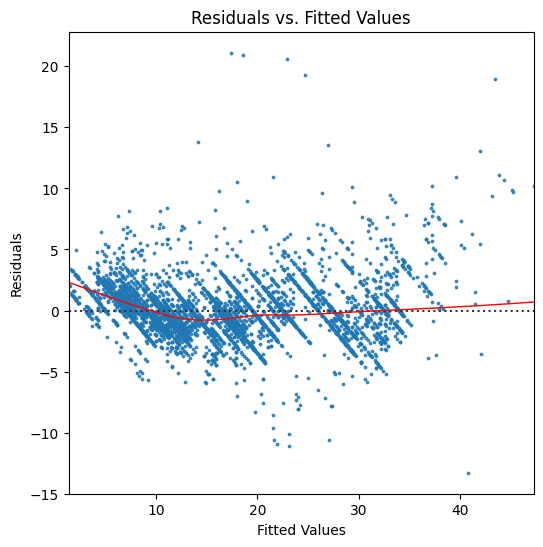

In [131]:

# Residuals vs. Fitted Values plot
fig = plt.figure(figsize=(6, 6))
sns.residplot(x=ride_trim['fittedvalues'], 
              y=ride_trim['residuals'],  
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})

# Labels and title
plt.title("Residuals vs. Fitted Values")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()


### Section Summary

- ADD COMMENTS HERE

## The model describes all observations 

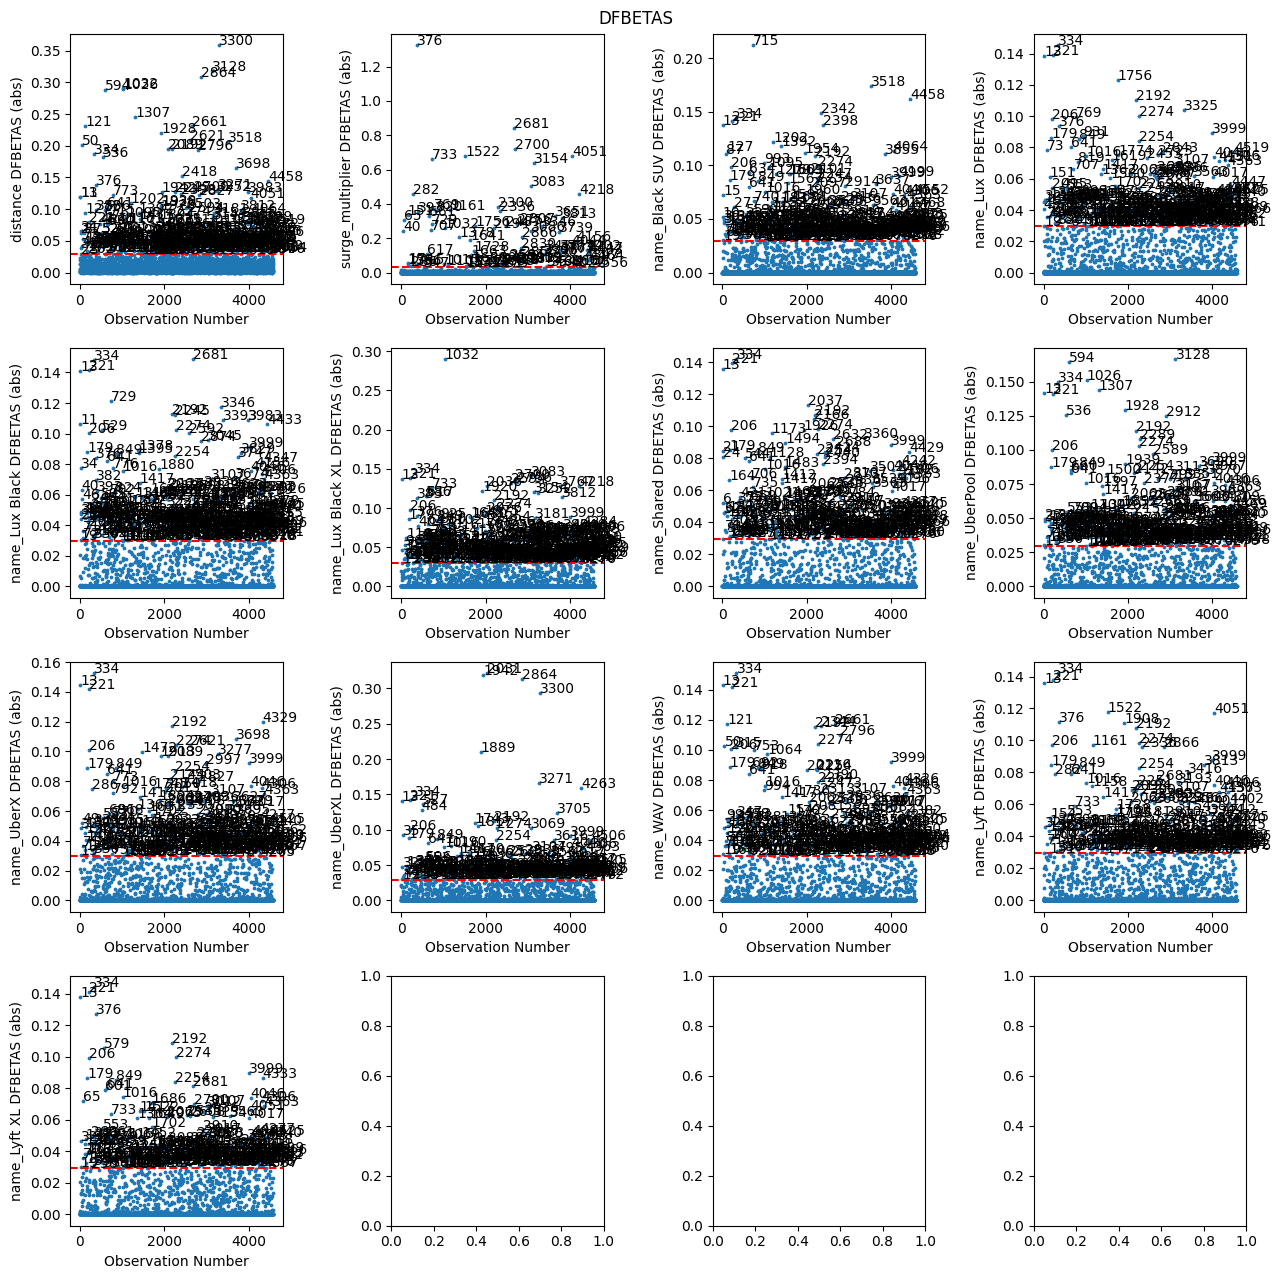

In [153]:
def plot_dfbetas(column, ax, dfbetas_data, label_level=2 / np.sqrt(len(ride_trim))):
    idx = ride_trim.columns.get_loc(column)
    dfbetas_values = dfbetas_data[:, idx]

    ax.set_ylabel(f"{column} DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trim.index, np.abs(dfbetas_values), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Label outliers
    outliers = ride_trim.index[np.abs(dfbetas_values) > label_level]
    for i in outliers:
        ax.annotate(str(i), (i, np.abs(dfbetas_values[i])))

dfbetas_data = res.get_influence().dfbetas  # Compute once
# Create subplots (Updated grid size to accommodate all variables)
fig, axes = plt.subplots(4, 4, figsize=(13, 13))  # Now it's 3x3 to handle 8 plots
plt.suptitle("DFBETAS")


# Call the plot_dfbetas function for each of the desired columns
plot_dfbetas("distance", axes[0, 0], dfbetas_data)
plot_dfbetas("surge_multiplier", axes[0, 1], dfbetas_data)
plot_dfbetas("name_Black SUV", axes[0, 2], dfbetas_data)
plot_dfbetas("name_Lux", axes[0,3], dfbetas_data)
plot_dfbetas("name_Lux Black", axes[1, 0], dfbetas_data)
plot_dfbetas("name_Lux Black XL", axes[1, 1], dfbetas_data)
plot_dfbetas("name_Shared", axes[1, 2], dfbetas_data)
plot_dfbetas("name_UberPool", axes[1, 3], dfbetas_data)
plot_dfbetas("name_UberX", axes[2, 0], dfbetas_data)
plot_dfbetas("name_UberXL", axes[2, 1], dfbetas_data)
plot_dfbetas("name_WAV", axes[2, 2], dfbetas_data)
plot_dfbetas("name_Lyft", axes[2, 3], dfbetas_data)
plot_dfbetas("name_Lyft XL", axes[3, 0], dfbetas_data)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


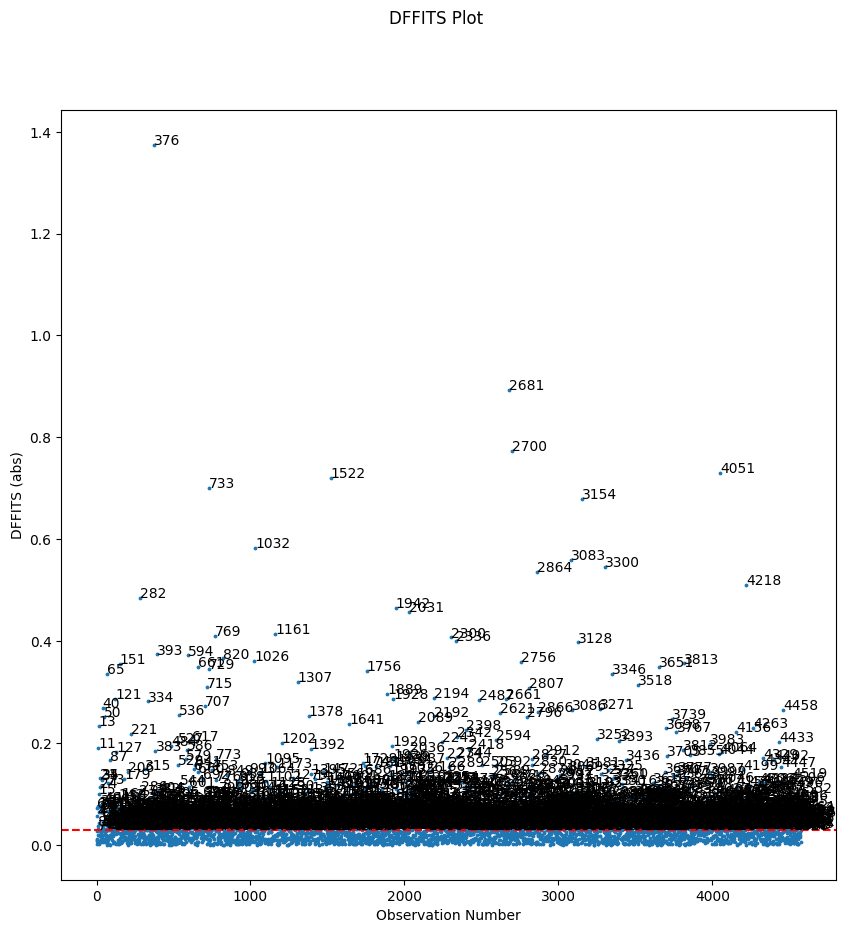

In [133]:
# DFFITS
def plot_dffits(ax, label_level=2 * np.sqrt(len(ride_trim)) / len(ride_trim)):
    # Calculate DFFITS for all observations
    ride_trim["dffits"] = res.get_influence().dffits[0]

    # Plot DFFITS values
    ax.set_ylabel("DFFITS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trim.index, np.abs(ride_trim["dffits"]), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Optional: label outliers
    outliers = ride_trim[np.abs(ride_trim["dffits"]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(ride_trim["dffits"][i])))

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle("DFFITS Plot")

# Plot DFFITS
plot_dffits(ax)

plt.show()


In [140]:
# Store DFBETAS outliers in a dictionary
outliers_dfbetas_all = {}

# Compute DFBETAS once
dfbetas_data = res.get_influence().dfbetas  

# Define feature columns (excluding 'price')
desired_cols = ride_trim.columns[1:14]

# Set outlier threshold
label_level = 0.2 / np.sqrt(len(ride_trim))

# Iterate over each predictor
for i, column in enumerate(desired_cols):
    # Get DFBETAS values
    dfbetas_values = dfbetas_data[:, i]  
    
    # Store outliers
    outliers_dfbetas_all[column] = ride_trim[np.abs(dfbetas_values) > label_level]
    
# Example: Check distance outliers
outliers_dfbetas_all.get("distance", pd.DataFrame()).sort_values(by="distance", ascending=True).head()


,price,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,residuals,fittedvalues,dffits,dfbetas_distance,dfbetas_surge_multiplier,dfbetas_name_Black SUV,dfbetas_name_Lux,dfbetas_name_Lux Black,dfbetas_name_Lux Black XL,dfbetas_name_Lyft,dfbetas_name_Lyft XL,dfbetas_name_Shared,dfbetas_name_UberPool,dfbetas_name_UberX,dfbetas_name_UberXL,dfbetas_name_WAV,dfbetas_price
2483,7.0,0.39,1.0,0,0,0,0,0,0,0,0,0,0,1,2.160298,4.839702,0.050518,-0.022383,0.000792,-0.000191,0.000105,0.000115,0.000079,-0.000071,-0.000159,-0.000193,0.000309,0.000449,0.000011,0.032502,0.003166
2759,16.0,0.39,1.0,0,0,0,0,0,0,0,0,0,0,0,0.660697,15.339303,0.015209,-0.006545,0.000232,-0.009550,-0.009394,-0.009570,-0.009349,-0.009327,-0.009542,-0.009414,-0.009481,-0.009575,-0.009613,-0.009564,0.005066
4348,7.0,0.39,1.0,0,0,0,0,0,0,0,0,0,0,1,2.160298,4.839702,0.050518,-0.022383,0.000792,-0.000191,0.000105,0.000115,0.000079,-0.000071,-0.000159,-0.000193,0.000309,0.000449,0.000011,0.032502,0.003166
845,7.0,0.39,1.0,0,0,0,0,0,0,0,0,1,0,0,2.375665,4.624335,0.055315,-0.024938,0.000883,-0.000213,0.000117,0.000128,0.000088,-0.000079,-0.000177,-0.000215,0.000344,0.035406,0.000013,0.000383,0.003527
2013,9.5,0.39,1.0,0,0,0,0,0,0,0,0,1,0,0,4.875665,4.624335,0.113564,-0.051199,0.001812,-0.000436,0.000240,0.000263,0.000180,-0.000162,-0.000363,-0.000442,0.000707,0.072691,0.000026,0.000786,0.007242


In [142]:
# Compute DFFITS
ride_trim['dffits'] = res.get_influence().dffits[0]

# Define DFFITS threshold
n, p = len(ride_trim), len(res.params)
dffits_threshold = 2 * np.sqrt(p / n)

# Identify DFFITS outliers
outliers_dffits = ride_trim[np.abs(ride_trim['dffits']) > dffits_threshold]

# Ensure desired columns exist before filtering
cols_to_keep = [col for col in desired_cols if col in ride_trim.columns] + ['dffits']
outliers_dffits_selected = outliers_dffits[cols_to_keep]

# Sort by DFFITS
outliers_dffits_sorted = outliers_dffits_selected.sort_values(by='dffits', ascending=True)

# Display top outliers
outliers_dffits_sorted.head()


,distance,surge_multiplier,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,dffits
376,4.60,2.50,0,0,0,0,1,0,0,0,0,0,0,-1.374609
4051,0.64,2.00,0,0,0,0,1,0,0,0,0,0,0,-0.730136
1522,2.66,2.00,0,0,0,0,1,0,0,0,0,0,0,-0.719726
282,2.49,2.00,0,0,0,0,1,0,0,0,0,0,0,-0.484509
1161,4.28,1.75,0,0,0,0,1,0,0,0,0,0,0,-0.413562


### Section Summary

- ADD COMMENTS HERE

## Additional predictor variables are not required 

The dataset was very comprehensive. We beleive that this assumption is met. The variables we have are tested and important. And we started with possibly every predictor possible.

## No multicollinearity

In [144]:

# Create a subset with the selected columns (including constant term)
X_selected = sm.add_constant(ride_dummies[desired_cols])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns  # The names of the features
vif_data['VIF'] = [vif(X_selected.values, i) for i in range(X_selected.shape[1])]  # Calculate VIF for each feature

# Display max and mean VIF
print("Max VIF = ", max(vif_data['VIF']))
print("Mean VIF = ", np.mean(vif_data['VIF']))

# Show the VIF DataFrame
print(vif_data)

Max VIF =  123.32784495620008
Mean VIF =  10.348761709580105
              Feature         VIF
0               const  123.327845
1            distance    1.003048
2    surge_multiplier    1.036844
3      name_Black SUV    1.760178
4            name_Lux    1.755885
5      name_Lux Black    1.803555
6   name_Lux Black XL    1.740255
7           name_Lyft    1.733173
8        name_Lyft XL    1.789596
9         name_Shared    1.723326
10      name_UberPool    1.782296
11         name_UberX    1.822451
12        name_UberXL    1.794664
13           name_WAV    1.809549


### Section Summary

- ADD COMMENTS HERE


## Overall Assumption Summary

#### 1. x vs y is linear

    - 

#### 2. The residuals are independent across all values of y

    - 

#### 3. The residuals are normally distributed and centered at zero

    - 

#### 4. The residuals have constant variance across all values of x

    - 

#### 5. The model describes all observations (i.e., there are no influential points)

    - 

#### 6. Additional predictor variables are unnecessary

    - 

#### 7. No multicollinearity


# Applying Transformations for unmet assumptions

Don't need?

# Check interactions and apply them if needed

In [ ]:
#interactions

# Model Assesments

## $R^2$

In [ ]:
r_squared = res.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.9307961919921807


- add interpretation

## F-Test

In [ ]:
f_statistic = res.fvalue
f_p_value = res.f_pvalue

print(f"F-statistic: {f_statistic}, p-value: {f_p_value}")

F-statistic: 2739.6080448521047, p-value: 0.0


- add interpretation

## RMSE

In [ ]:
residuals = res.resid

rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 3.585179064483643


- add interpretation

## MAE

In [ ]:
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae}")


MAE: 2.647521756943202


- add interpretation

# Statistical inference

### hypothesis tests for all slopes

In [151]:
# Get t-values, p-values, and coefficients for all predictors
t_values = res.tvalues  # t-statistics
p_values = res.pvalues  # p-values
coefficients = res.params  # Estimated slopes

# Combine results into a DataFrame for better readability
hypothesis_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    't-value': t_values,
    'p-value': p_values
})

# Display results sorted by p-value
hypothesis_test_results.sort_values(by="p-value")


,Coefficient,t-value,p-value
distance,2.719139,87.040247,0.000000e+00
surge_multiplier,16.771215,45.321242,0.000000e+00
name_Black SUV,10.180177,59.512824,0.000000e+00
name_Lux Black XL,11.213416,64.706826,0.000000e+00
name_Lyft,-11.163034,-63.968185,0.000000e+00
name_Shared,-13.970184,-80.491249,0.000000e+00
name_UberPool,-11.479852,-67.657657,0.000000e+00
name_UberX,-10.714968,-64.036427,0.000000e+00
name_WAV,-10.499601,-62.482459,0.000000e+00
name_Lyft XL,-5.510806,-32.220776,2.081387e-205


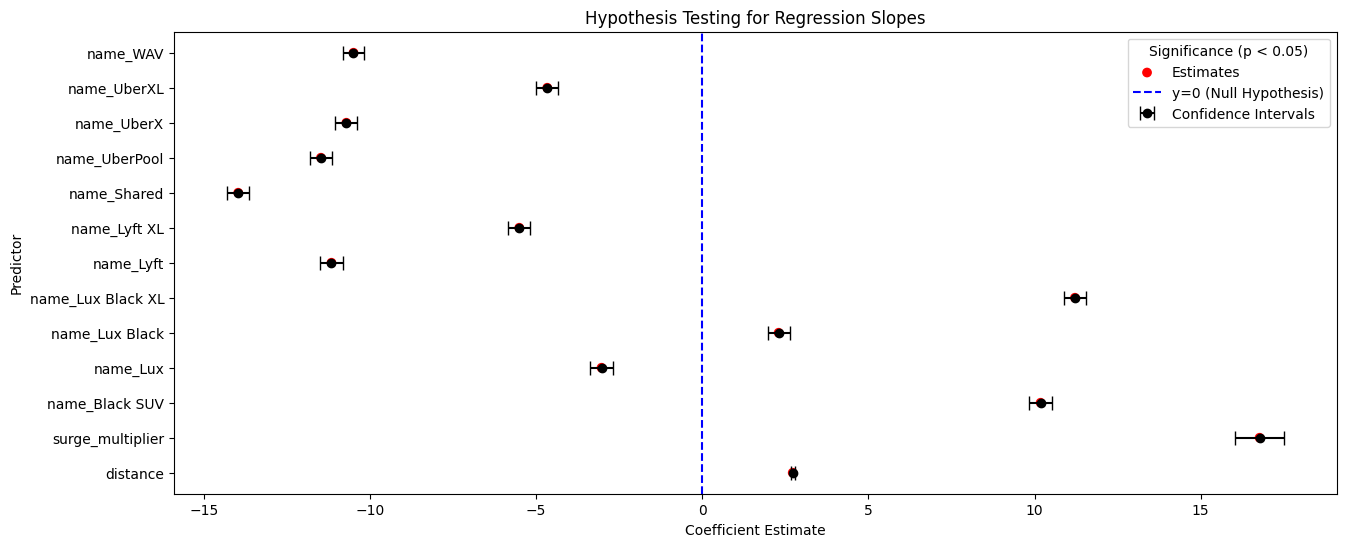

In [152]:

# Construct hypothesis test data frame
res_hypothesis_test = {
    'term': res.params.index.tolist(),
    'coef': res.params.tolist(),
    'conf_low': res.conf_int().loc[:, 0].tolist(),
    'conf_high': res.conf_int().loc[:, 1].tolist(),
    't_value': res.tvalues.tolist(),
    'p_value': res.pvalues.tolist()
}

df_hypothesis = pd.DataFrame(res_hypothesis_test)

# Selecting just slopes (excluding intercept)
df_hypothesis = df_hypothesis[df_hypothesis['term'] != 'const']

# Define a significance threshold (e.g., 0.05)
df_hypothesis['significant'] = df_hypothesis['p_value'] < 0.05

# Plot hypothesis test results
plt.figure(figsize=(15, 6))

# Plot confidence intervals using error bars
plt.errorbar(df_hypothesis['coef'], df_hypothesis['term'],
             xerr=[df_hypothesis['coef'] - df_hypothesis['conf_low'], 
                   df_hypothesis['conf_high'] - df_hypothesis['coef']], 
             fmt='o', capsize=5, color='black', label='Confidence Intervals')

# Scatter plot for coefficients, color-coded by significance
plt.scatter(df_hypothesis['coef'], df_hypothesis['term'], 
            c=df_hypothesis['significant'].map({True: 'red', False: 'gray'}), 
            label='Estimates')

plt.axvline(0, color='blue', linestyle='--', label='y=0 (Null Hypothesis)')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Predictor')
plt.legend(title="Significance (p < 0.05)")
plt.title('Hypothesis Testing for Regression Slopes')
plt.show()


#### ADD SUMMARY HERE
 - you can group these together as "significant" or "not" in your interpretation

### confidence intervals for all slopes

- take extra care in providing accurate interpretations if your model includes an interaction term

### confidence interval for the mean of  $ Y $


- you cannot plot this, so pick specific values for the predictors to use and then interpret

### prediction interval for an individual observation

- you cannot plot this, so pick specific values for the predictors to use and then interpret

# Summary and Next Steps